# K-Nearest Neighbours Regression

## Importing the necessary Libraries and Packages

In [94]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # accuracy metric
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Importing the csv file as a DataFrame

In [95]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
diabetes=load_diabetes()
df_diabetes = sklearn_to_df(diabetes)
df_diabetes=df_diabetes.drop(['s1','s2','s3','s4','s5','s6','sex'],axis=1)
df_diabetes.head()

,age,bmi,bp,target
0,0.038076,0.061696,0.021872,151.0
1,-0.001882,-0.051474,-0.026328,75.0
2,0.085299,0.044451,-0.005670,141.0
3,-0.089063,-0.011595,-0.036656,206.0
4,0.005383,-0.036385,0.021872,135.0


## Exploratory Data Analysis

Formal information about the dataset

In [96]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   bmi     442 non-null    float64
 2   bp      442 non-null    float64
 3   target  442 non-null    float64
dtypes: float64(4)
memory usage: 13.9 KB


Description of the dataset

In [97]:
df_diabetes.describe()

,age,bmi,bp,target
count,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,-2.245564e-16,-4.797570e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-9.027530e-02,-1.123988e-01,25.000000
25%,-3.729927e-02,-3.422907e-02,-3.665608e-02,87.000000
50%,5.383060e-03,-7.283766e-03,-5.670422e-03,140.500000
75%,3.807591e-02,3.124802e-02,3.564379e-02,211.500000
max,1.107267e-01,1.705552e-01,1.320436e-01,346.000000


Checking if any null value exists

In [98]:
df_diabetes.isnull().sum()

age       0
bmi       0
bp        0
target    0
dtype: int64

Columns of the dataset

In [99]:
df_diabetes.columns

Index(['age', 'bmi', 'bp', 'target'], dtype='object')

Correlations between the variables

In [100]:
df_diabetes.corr()

,age,bmi,bp,target
age,1.000000,0.185085,0.335428,0.187889
bmi,0.185085,1.000000,0.395411,0.586450
bp,0.335428,0.395411,1.000000,0.441482
target,0.187889,0.586450,0.441482,1.000000


## Now taking 2 parts from the dataset:

### X : which contains all the data except the <b>target</b> column<br>y : which contains only the <b>target</b> column

In [101]:
X = df_diabetes.iloc[:,:-1].values
y = df_diabetes.iloc[:,-1].values

## Visualisation of the Data

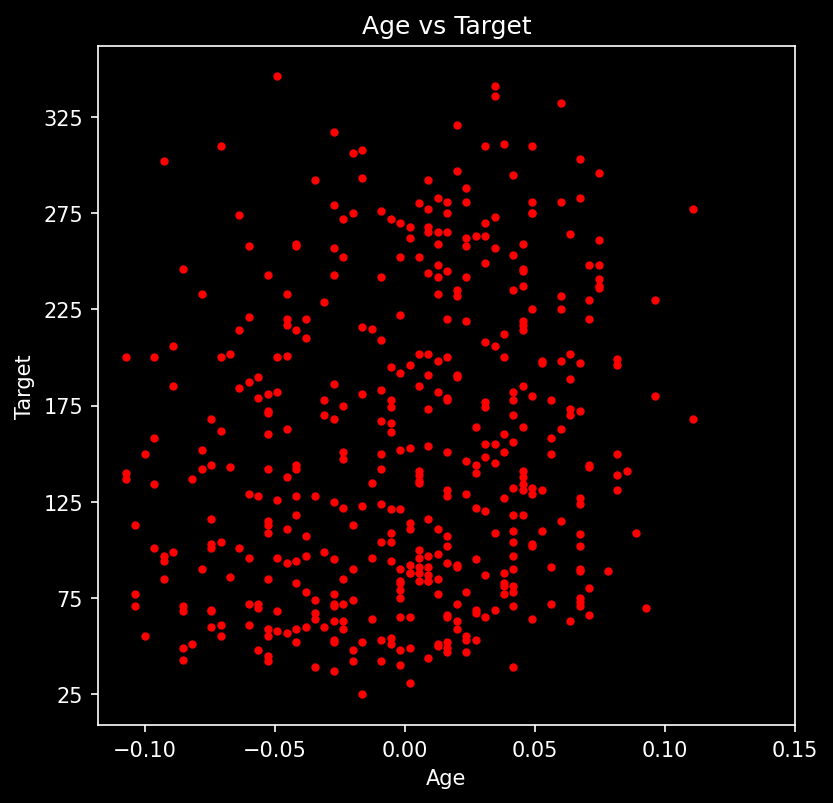

In [102]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Age = df_diabetes["age"]
Target = df_diabetes["target"]
plt.scatter(Age, Target, marker=".", color="red")
plt.xticks(np.arange(-0.1, 0.16, 0.05))
plt.yticks(np.arange(25, 350, 50))
plt.title("Age vs Target")
plt.xlabel("Age")
plt.ylabel("Target")
plt.savefig("Images/Age_vs_Target.png",bbox_inches='tight')

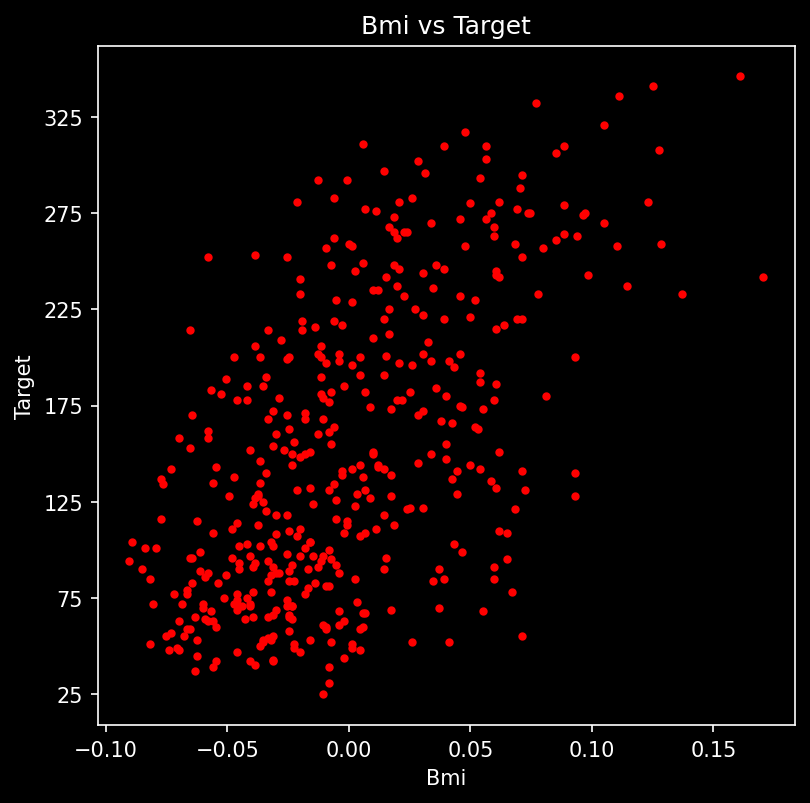

In [103]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Bmi = df_diabetes["bmi"]
Target = df_diabetes["target"]
plt.scatter(Bmi, Target, marker=".", color="red")
plt.xticks(np.arange(-0.1, 0.16, 0.05))
plt.yticks(np.arange(25, 350, 50))
plt.title("Bmi vs Target")
plt.xlabel("Bmi")
plt.ylabel("Target")
plt.savefig("Images/Bpi_vs_Target.png",bbox_inches='tight')

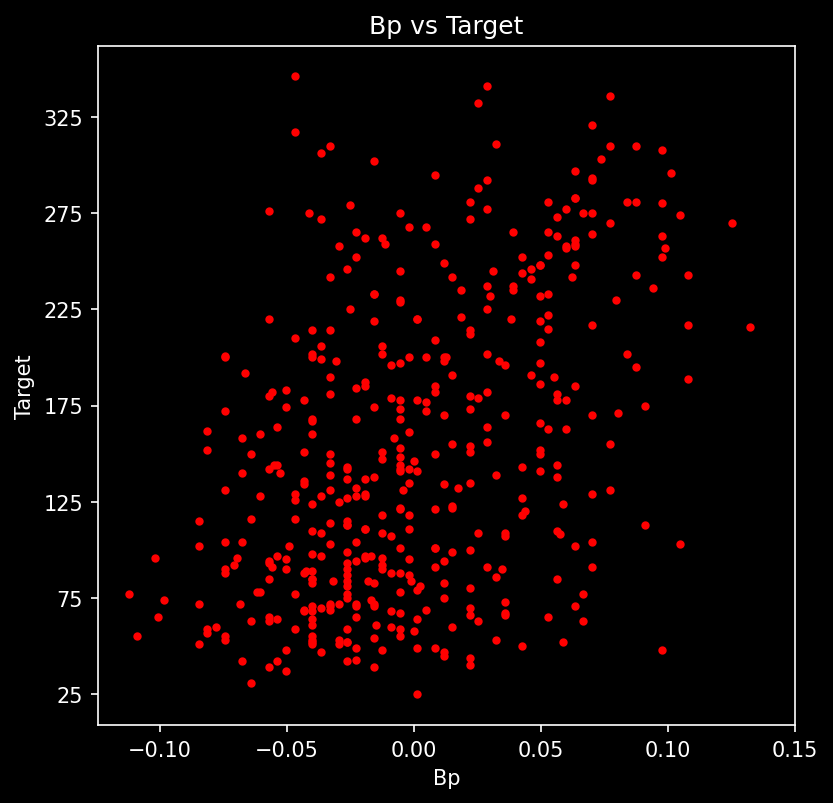

In [104]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Bp = df_diabetes["bp"]
Target = df_diabetes["target"]
plt.scatter(Bp, Target, marker=".", color="red")
plt.xticks(np.arange(-0.1, 0.16, 0.05))
plt.yticks(np.arange(25, 350, 50))
plt.title("Bp vs Target")
plt.xlabel("Bp")
plt.ylabel("Target")
plt.savefig("Images/Bp_vs_Target.png",bbox_inches='tight')

## Split the X and y dataframes for training and testing

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [106]:
n=X_train.shape[0]
rmse_val = {} # To store rmse values for different k
for K in range(int(0.67*n**0.5),int(1.33*n**0.5)): # 2/3rd of sqrt(n) to 1.33 times sqrt(n)
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  # fit the model
    pred = model.predict(X_test) # make prediction on test set
    error = mean_squared_error(y_test,pred,squared=False) # calculate rmse
    rmse_val[K] = error # store rmse values
print(min(rmse_val, key=rmse_val.get)) # print the minimum rmse value

23


## Implementation of the Model

In [107]:
knn = KNeighborsRegressor(n_neighbors=23)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [108]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 49.4927536231884
Mean Squared Error (MSE) : 3723.8117622348245
Root Mean Squared Error (RMSE) : 61.02304287918478
Mean Absolute Percentage Error (MAPE) : 0.3709755229134585
